<center>
    <h2> CHƯƠNG 3 - PHẦN 03: NAIVE BAYES VÀ BÀI TOÁN NLP</h2>
</center>



# THỰC HÀNH TRÊN LỚP
----
## 1. Sinh viên áp dụng thuật toán KNN --> Cho bài toán này: 


In [12]:
#Gọi các thư viện:
import pandas as pd
import numpy as np
import nltk as nltk
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [13]:
print(nltk.__version__)

3.7


In [1]:
#Tải file dữ liệu sau khi đã tiền xử lý
import pandas as pd
path='Data/data_finish.csv'
data_finish = pd.read_csv(path)
data_finish.head(10)

,class,tweet_ok
0,0,woman complain clean house man always take trash
1,1,boy dats dwn bad cuffin dat hoe st place
2,1,dawg ever fuck bitch start cry confuse shit
3,1,look like tranny
4,1,shit hear might true might faker bitch tell ya
5,1,shit blow faithful somebody still fuck hoe
6,1,sit hate another bitch get much shit go
7,1,cause tire big bitch come us skinny girls
8,1,might get ya bitch back thats
9,1,hobbies include fight mariam bitch


In [2]:
#Biến độc lập X:
X = data_finish.loc[:,'tweet_ok']
X

0         woman complain clean house man always take trash
1                 boy dats dwn bad cuffin dat hoe st place
2              dawg ever fuck bitch start cry confuse shit
3                                         look like tranny
4           shit hear might true might faker bitch tell ya
                               ...                        
56652    could end without mention trump feminism photo...
56653    chateaubriand stovells absolutely lovely food yum
56654                              frarou woohoo euro kick
56655    think lovely conversation guess debate people ...
56656    happy tuesday feel fantastic today look forwar...
Name: tweet_ok, Length: 56657, dtype: object

In [3]:
#Biến phụ thuộc y:
y = data_finish.loc[:,'class']
y

0        0
1        1
2        1
3        1
4        1
        ..
56652    1
56653    0
56654    0
56655    0
56656    0
Name: class, Length: 56657, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
#Tách tập dữ liệu thành Train - Test (tỷ lệ: 0.8 - 0.2)
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)
print('1.Tập ban đầu:',data_finish.shape)
print('-------------------------------')
print('a.Tập Train: ', X_train.shape)
print('b.Tập Test: ', y_test.shape)

1.Tập ban đầu: (56657, 2)
-------------------------------
a.Tập Train:  (45325,)
b.Tập Test:  (11332,)


In [5]:
X_train

53361                        yup look like skinny look old
31648    abbie nike black write americas pornhub click ...
36605                        sucky fucky asian massage end
26633       pretty blonde girl franziskafacella day beauty
47337    saturday afternoon drink bake fun time drink v...
                               ...                        
54343                            game day gawa daretodream
38158    vote dailypoll whitehouse dinner invite udtapu...
860      pornandroidiphoneipadsexxxx anal hardcore brit...
15795    media matter executive behind stoprush campaig...
56422    count days make days count flower friday vine via
Name: tweet_ok, Length: 45325, dtype: object

In [6]:
# Tính TF-IDF cho tập dữ liệu
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text

#Convert a collection of raw documents to a matrix of TF-IDF features.

vector = TfidfVectorizer(analyzer='word', max_features=15000, stop_words = 'english')

vector.fit(data_finish['tweet_ok'])
X_train_tfidf = vector.transform(X_train)
X_test_tfidf = vector.transform(X_test)

In [7]:
print('1.Train:',X_train_tfidf.shape)
print('2.Test:',X_test_tfidf.shape)

1.Train: (45325, 15000)
2.Test: (11332, 15000)


In [8]:
#{Học viên viết code vào đây}
from sklearn.neighbors import KNeighborsClassifier

#Khai báo sử dụng model KNN:
KNN_NLP = KNeighborsClassifier()

#huấn luyện mô hình với tập huấn luyện Train
KNN_NLP.fit(X_train_tfidf,y_train)

#Danh sách các tham số của model:
KNN_NLP.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [9]:
#Đánh giá độ chính xác của mô hình trên tập huấn luyện
acc_KNN = round(KNN_NLP.score(X_train_tfidf, y_train) * 100, 2)

print('Độ chính xác của mô hình trên tập huấn luyện: ', acc_KNN, '%')

Độ chính xác của mô hình trên tập huấn luyện:  75.75 %


In [10]:
from sklearn.metrics import accuracy_score
#Dự đoán và tính đoán độ chính xác của model trên tập Test:
y_pred = KNN_NLP.predict(X_test_tfidf)

acc1 = round(accuracy_score(y_test, y_pred)*100, 2)
print('1.Độ chính xác của mô hình trên tập Test: ', acc1, '%')

acc2 = accuracy_score(y_test, y_pred, normalize=False)
print('2.Tổng số mẫu dự đoán đúng:', acc2, ' /', len(y_test))
print('3.Tổng số mẫu dự đoán sai:', len(y_test) - acc2, ' /', len(y_test))

1.Độ chính xác của mô hình trên tập Test:  72.13 %
2.Tổng số mẫu dự đoán đúng: 8174  / 11332
3.Tổng số mẫu dự đoán sai: 3158  / 11332


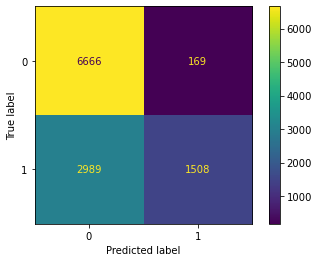

In [14]:
#Hiển thị confusion matrix:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN_NLP, X_test_tfidf, y_test)  
plt.show()

## 2. Sinh viên áp dụng thuật toán Cây quyết định --> Cho bài này:
---

In [16]:
#{Học viên viết code vào đây}

#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Khai báo model Decision Tree sử dụng các tham số mặc định
model_tree = DecisionTreeClassifier()

#huấn luyện mô hình với tập huấn luyện Train
model_tree.fit(X_train_tfidf,y_train)

#Danh sách các tham số của model:
model_tree.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [17]:
#Đánh giá độ chính xác của mô hình trên tập huấn luyện
acc_tree = round(model_tree.score(X_train_tfidf, y_train) * 100, 2)

print('Độ chính xác của mô hình trên tập huấn luyện: ', acc_tree, '%')

Độ chính xác của mô hình trên tập huấn luyện:  99.91 %


In [18]:
from sklearn.metrics import accuracy_score
#Dự đoán và tính đoán độ chính xác của model trên tập Test:
y_pred = model_tree.predict(X_test_tfidf)

acc1 = round(accuracy_score(y_test, y_pred)*100, 2)
print('1.Độ chính xác của mô hình trên tập Test: ', acc1, '%')

acc2 = accuracy_score(y_test, y_pred, normalize=False)
print('2.Tổng số mẫu dự đoán đúng:', acc2, ' /', len(y_test))
print('3.Tổng số mẫu dự đoán sai:', len(y_test) - acc2, ' /', len(y_test))

1.Độ chính xác của mô hình trên tập Test:  93.9 %
2.Tổng số mẫu dự đoán đúng: 10641  / 11332
3.Tổng số mẫu dự đoán sai: 691  / 11332


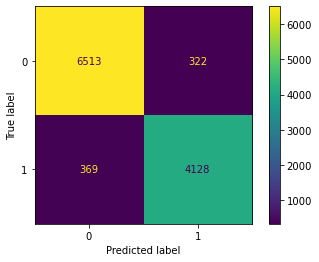

In [19]:
#Hiển thị confusion matrix:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_tree, X_test_tfidf, y_test)  
plt.show()

# 5. THỰC HÀNH: THUẬT TOÁN NAIVE BAYES
---
Học viên tìm hiểu và thực hiện theo hướng dẫn của bài toán lọc Email mục 3.3 bài 32 trang học máy cơ bản của Vũ Hữu Tiệp:  https://machinelearningcoban.com/2017/08/08/nbc/

<img src = 'Pic/Email.png' width='400px'>



In [2]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}

## packages 
from __future__ import division, print_function, unicode_literals
import numpy as np
from scipy.sparse import coo_matrix # for sparse matrix
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score # for evaluating results

# data path and file name 
path = 'ex6DataPrepared/'
train_data_fn = 'train-features.txt'
test_data_fn = 'test-features.txt'
train_label_fn = 'train-labels.txt'
test_label_fn = 'test-labels.txt'


In [3]:
nwords = 2500 

def read_data(data_fn, label_fn):
    ## read label_fn
    with open(path + label_fn) as f:
        content = f.readlines()
    label = [int(x.strip()) for x in content]

    ## read data_fn
    with open(path + data_fn) as f:
        content = f.readlines()
    # remove '\n' at the end of each line
    content = [x.strip() for x in content] 

    dat = np.zeros((len(content), 3), dtype = int)
    
    for i, line in enumerate(content): 
        a = line.split(' ')
        dat[i, :] = np.array([int(a[0]), int(a[1]), int(a[2])])
    
    # remember to -1 at coordinate since we're in Python
    # check this: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html
    # for more information about coo_matrix function 
    data = coo_matrix((dat[:, 2], (dat[:, 0] - 1, dat[:, 1] - 1)),\
             shape=(len(label), nwords))
    return (data, label)

In [5]:
(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)

clf = MultinomialNB()
clf.fit(train_data, train_label)

y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 700, accuracy = 98.08%


In [6]:
train_data_fn = 'train-features-100.txt'
train_label_fn = 'train-labels-100.txt'
test_data_fn = 'test-features.txt'
test_label_fn = 'test-labels.txt'

(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)
clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 100, accuracy = 97.69%


In [7]:
train_data_fn = 'train-features-50.txt'
train_label_fn = 'train-labels-50.txt'
test_data_fn = 'test-features.txt'
test_label_fn = 'test-labels.txt'

(train_data, train_label)  = read_data(train_data_fn, train_label_fn)
(test_data, test_label)  = read_data(test_data_fn, test_label_fn)
clf = MultinomialNB()
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 50, accuracy = 97.31%


In [8]:
clf = BernoulliNB(binarize = .5)
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)
print('Training size = %d, accuracy = %.2f%%' % \
      (train_data.shape[0],accuracy_score(test_label, y_pred)*100))

Training size = 50, accuracy = 69.62%
